# Amortiguador

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
%matplotlib notebook

\begin{equation}
m\ddot{x} + k x + B \dot{x} = 0
\end{equation}

si recordamos que $\omega_0 ^2 = k/m$ y definimos $B/m\equiv 2\Gamma$, tendremos

\begin{equation}
\ddot{x} + 2\Gamma \dot{x}+ \omega_0^2 x = 0
\end{equation}

## Amortiguado:
Si $\omega_0^2 > \Gamma^2$

In [77]:
t=np.linspace(0,20,200)
k = 3.0 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

condiciones0=[0.6,0.4] #condiciones iniciales

In [78]:
omega0 = k/m
Gamma = B/(2*m)

Esta es una ecuación diferencial ordinaria (EDO). En python existe una función llamada _odeint_ del paquete _integrate_ de la libreria _scipy_, que permite integrar sistemas del tipo 
\begin{equation}
\frac{dy}{dt} = f(x,y)
\end{equation}
con condiciones iniciales $y(0) = y_{0}$. Ahora bien, si nos fijamos bien, la ecuación diferencial que tenemos es de segundo orden. No hay problema. La podemos simplificar como un sistema de ecuaciones de primer orden como sigue:

\begin{align}
\dot{x} & = y \\
\dot{y} & = -\frac{k}{m} x - \frac{B}{m} y  
\end{align}

In [79]:
def amortiguador(variables,t):
    x,y=variables
    return[y,-k*x/m -B*y/m]

In [80]:
resultado=odeint(amortiguador,condiciones0,t)
posicionA,velocidadA=resultado.T

<IPython.core.display.Javascript object>


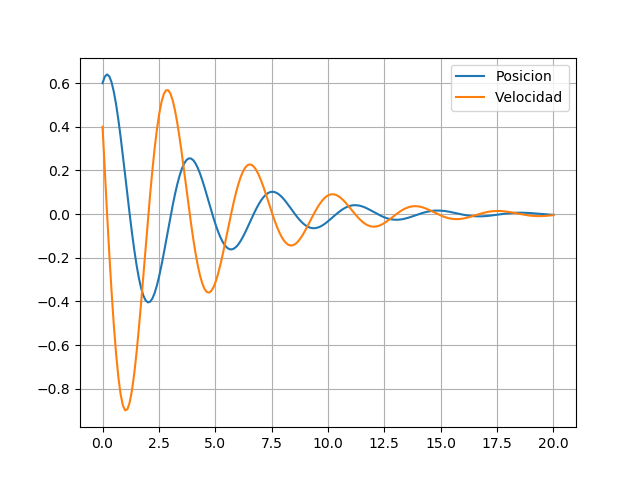

In [83]:
plt.figure()
plt.plot(t,posicionA,label="Posicion")
plt.plot(t,velocidadA,label='Velocidad')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


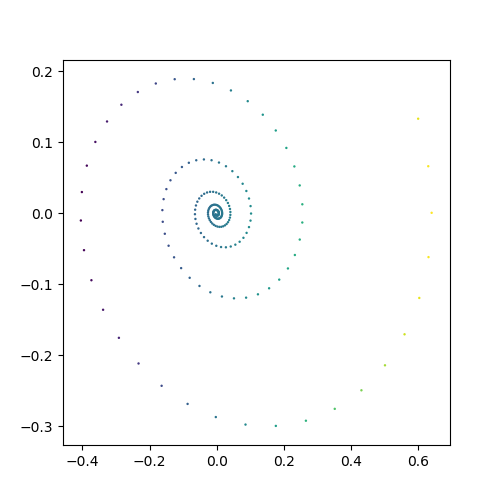

In [85]:
plt.figure(figsize = (5,5))
plt.scatter(posicionA, velocidadA/omega0,cmap='viridis',c=posicionA,lw = 0,s = 3)

In [116]:
z=np.linspace(0,.75,8)

<IPython.core.display.Javascript object>


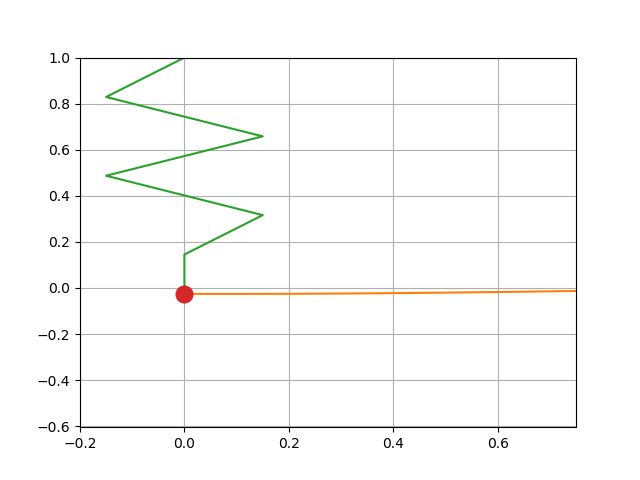

In [117]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.75), ylim=(min(posicionA)-.2,1))
ax.plot((-1,1),(3,3))
funcion, =ax.plot(z,posicionA[0:8])
resorte, =ax.plot([0,-.15,.15,-.15,.15,0,0],[1-i*(1-posicionA[0])/6 for i in range(7)])
pesa, = ax.plot(0,posicionA[0],'o',markersize=12)
def animate(i):
    pesa.set_data(0,posicionA[i])
    return pesa,
def animate2(i):
    a=[1-j*(1-posicionA[i])/6 for j in range(6)]
    a.append(posicionA[i])
    resorte.set_data([0,-.15,.15,-.15,.15,0,0],a)
    return resorte,
def animate3(i):
    b=posicionA[i:8+i]
    funcion.set_data(z,b)
    return funcion,
anim = animation.FuncAnimation(fig,animate,200,interval=100)
anim2 = animation.FuncAnimation(fig,animate2,200,interval=100)  
anim3 = animation.FuncAnimation(fig,animate3,200,interval=100)
plt.grid()
plt.show()

## Subamortiguado:
Si $\omega_0^2 < \Gamma^2$

In [94]:
k = .1 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [95]:
omega0 = k/m
Gamma = B/(2*m)

In [96]:
omega0**2 < Gamma**2

True

In [98]:
resultado = odeint(amortiguador, condiciones0, t) 
posicionS,velocidadS=resultado.T

<IPython.core.display.Javascript object>


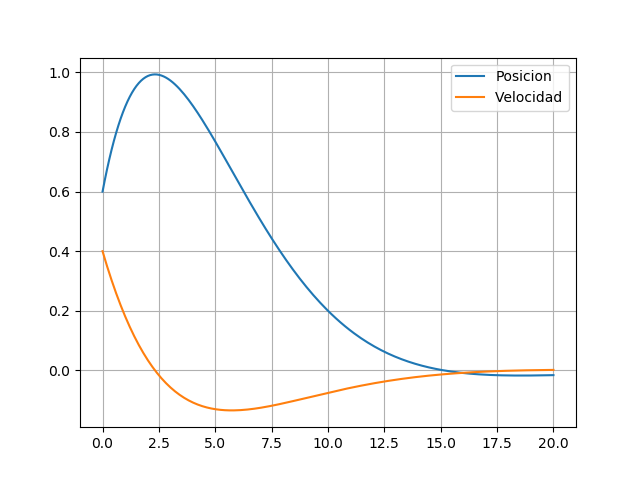

In [99]:
plt.figure()
plt.plot(t,posicionS,label="Posicion")
plt.plot(t,velocidadS,label='Velocidad')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


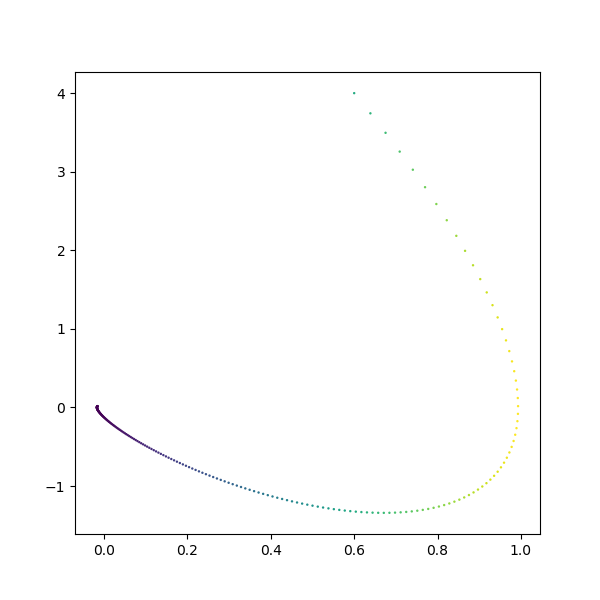

In [101]:
plt.figure(figsize = (6,6))
plt.scatter(posicionS, velocidadS/omega0,cmap='viridis',c=posicionS,lw = 0,s = 3)

<IPython.core.display.Javascript object>


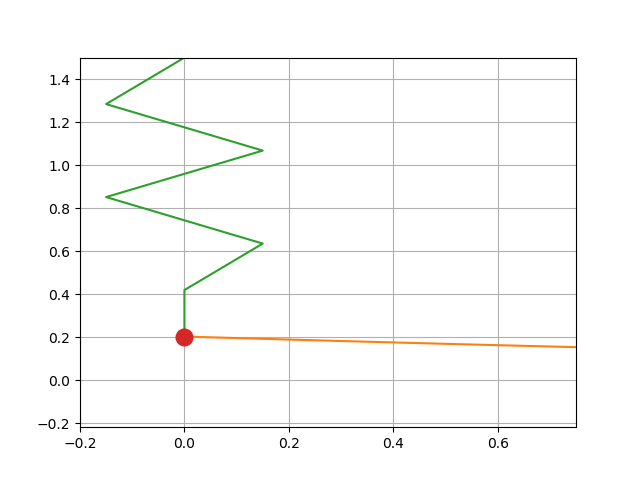

In [129]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.75), ylim=(min(posicionS)-.2,1.5))
ax.plot((-1,1),(3,3))
funcion, =ax.plot(z,posicionS[0:8])
resorte, =ax.plot([0,-.15,.15,-.15,.15,0,0],[1.5-i*(1.5-posicionS[0])/6 for i in range(7)])
pesa, = ax.plot(0,posicionS[0],'o',markersize=12)
def animate(i):
    pesa.set_data(0,posicionS[i])
    return pesa,
def animate2(i):
    a=[1.5-j*(1.5-posicionS[i])/6 for j in range(6)]
    a.append(posicionS[i])
    resorte.set_data([0,-.15,.15,-.15,.15,0,0],a)
    return resorte,
def animate3(i):
    b=posicionS[i:8+i]
    funcion.set_data(z,b)
    return funcion,
anim = animation.FuncAnimation(fig,animate,200,interval=100)
anim2 = animation.FuncAnimation(fig,animate2,200,interval=100)  
anim3 = animation.FuncAnimation(fig,animate3,200,interval=100)  
plt.grid()
plt.show()

## Críticamente amortiguado:
Si $\omega_0^2 = \Gamma^2$

In [121]:
k = np.sqrt(.0625) # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [122]:
omega0 = k/m
Gamma = B/(2*m)

In [123]:
omega0**2 == Gamma**2

True

In [124]:
resultado = odeint(amortiguador, condiciones0, t) 
posicionC,velocidadC=resultado.T

<IPython.core.display.Javascript object>


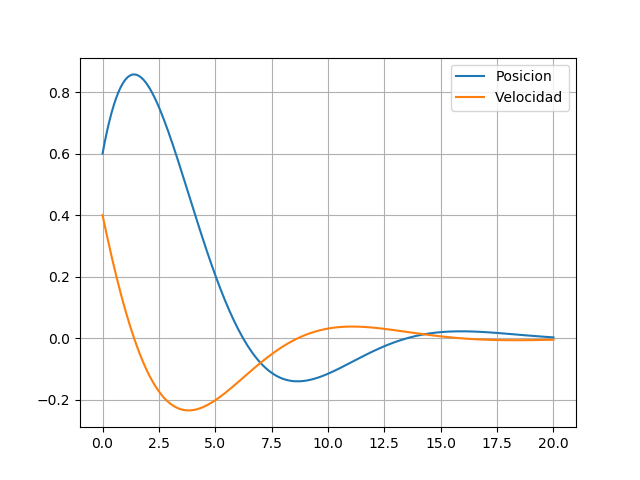

In [125]:
plt.figure()
plt.plot(t,posicionC,label="Posicion")
plt.plot(t,velocidadC,label='Velocidad')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


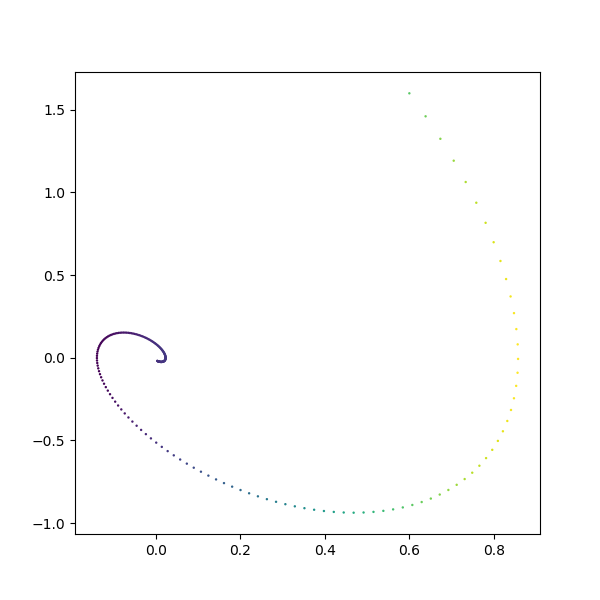

In [111]:
plt.figure(figsize = (6,6))
plt.scatter(posicionC, velocidadC/omega0,cmap='viridis',c=posicionC,lw = 0,s = 3)

<IPython.core.display.Javascript object>


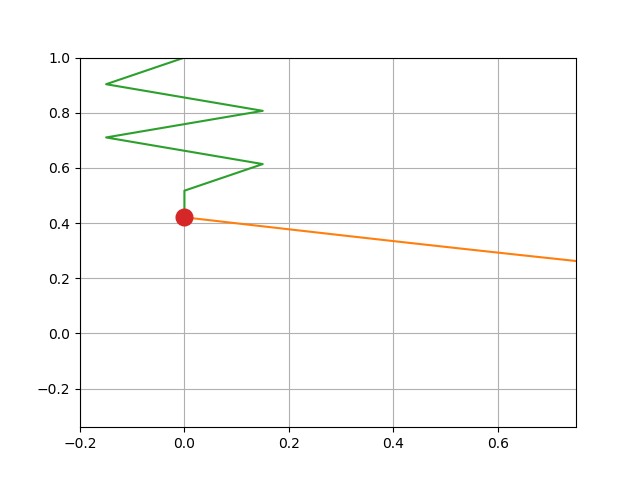

In [126]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.75), ylim=(min(posicionC)-.2,1))
ax.plot((-1,1),(3,3))
funcion, =ax.plot(z,posicionC[0:8])
resorte, =ax.plot([0,-.15,.15,-.15,.15,0,0],[1-i*(1-posicionC[0])/6 for i in range(7)])
pesa, = ax.plot(0,posicionC[0],'o',markersize=12)
def animate(i):
    pesa.set_data(0,posicionC[i])
    return pesa,
def animate2(i):
    a=[1-j*(1-posicionC[i])/6 for j in range(6)]
    a.append(posicionC[i])
    resorte.set_data([0,-.15,.15,-.15,.15,0,0],a)
    return resorte,
def animate3(i):
    b=posicionC[i:8+i]
    funcion.set_data(z,b)
    return funcion,
anim = animation.FuncAnimation(fig,animate,200,interval=100)
anim2 = animation.FuncAnimation(fig,animate2,200,interval=100)  
anim3 = animation.FuncAnimation(fig,animate3,200,interval=100)  
plt.grid()
plt.show()